## IMPORTING LIBRARIES

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING A SAMPLE OF THE DATA

In [110]:

df = pd.read_csv('main.tsv', sep='\t', header=0,nrows = 500000)

In [111]:
# Illustration of the top 5 rows in order to see how our table looks like
df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


# EXPLORATORY DATA ANALYSIS

#### See how many unique users are involved in this dataset, and how many are there in total.

In [112]:
if df['user_id'].nunique() == len(df):
    print('All users have explored only once')
else: print('Some users have visited the points of sales more than once')
print('Total unique users: ',df['user_id'].nunique(),' and total data entries: ',len(df))

Some users have visited the points of sales more than once
Total unique users:  157145  and total data entries:  500000


#### Let's see how many searches were conducted via cellphone and how many not

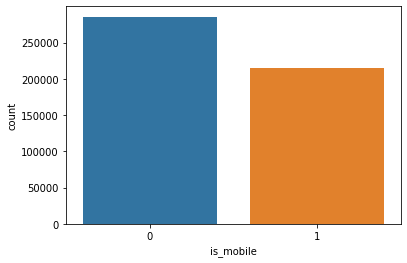

In [113]:
ax = sns.countplot(x="is_mobile", data=df)

As it looks many searches were conducted without date restrictions

#### Types of columns and Quantity of Nan Values

In [114]:
df.dtypes

user_id                 object
search_id               object
search_timestamp        object
point_of_sale            int64
geo_location_country     int64
is_mobile                int64
destination_id           int64
checkin_date            object
checkout_date           object
adult_count              int64
child_count              int64
infant_count             int64
room_count               int64
sort_type               object
applied_filters         object
impressions             object
dtype: object

In [115]:
# As it looks many searches were conducted without date restrictions
df.isna().sum()

user_id                      0
search_id                    0
search_timestamp             0
point_of_sale                0
geo_location_country         0
is_mobile                    0
destination_id               0
checkin_date                33
checkout_date               33
adult_count                  0
child_count                  0
infant_count                 0
room_count                   0
sort_type                    0
applied_filters         334596
impressions                  0
dtype: int64

Nan values on dates means that searches were conducted without date restrictions

#### New column --> 'days_before_staying'

In order to see how many days before the check in date the search was conducted,
the new column was created.

In [116]:

def correct_neg(x): # Created in order to substitute negative entries with Nan values on the below column
    if x<0:
        x= None
    return x

In [117]:
#Extracting date out of the timestamp. This aims to see how
# many days before staying did the search take place
df['search_date'] = df['search_timestamp'].str[:10]
df['search_date']= pd.to_datetime(df['search_date'])
df['check_date']= pd.to_datetime(df['checkin_date'])
df['days_before_staying'] = df['check_date'] - df['search_date']
df['days_before_staying'] = pd.to_timedelta(df['days_before_staying'], errors='coerce').dt.days
df['days_before_staying'] = df['days_before_staying'].apply(correct_neg)

The distribution of the days before can be illustrated below

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


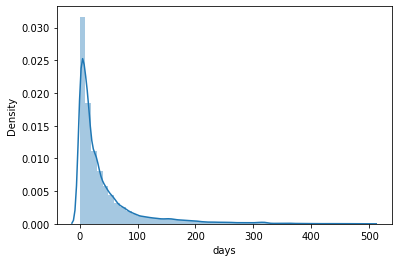

In [118]:
ax = sns.distplot(x=df['days_before_staying'],axlabel='days')

# We see that most of the people do not schedule much ahead. Maybe they decide vacations or business at the 
#very last moment, or waiting for something better to rise until the last moment

The date range of the searches is calculated below

In [119]:
print('The collected data are searches between ',min(df['search_date'].dt.date),' and ',
      max(df['search_date'].dt.date))

The collected data are searches between  2021-06-01  and  2021-07-31


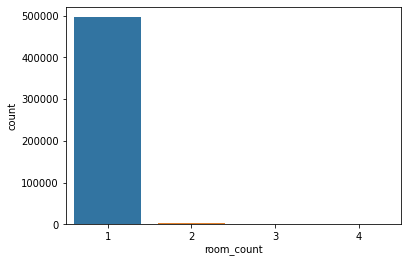

In [120]:
# How many rooms were the searches about
ax = sns.countplot(x=df['room_count'])

Most of the times the searches were about one room.

#### Data Types Transformation

In [121]:
df['point_of_sale'] = df['point_of_sale'].astype('str')
df['geo_location_country'] = df['geo_location_country'].astype('str')
df['destination_id'] = df['destination_id'].astype('str')

In [122]:
df.dtypes

user_id                         object
search_id                       object
search_timestamp                object
point_of_sale                   object
geo_location_country            object
is_mobile                        int64
destination_id                  object
checkin_date                    object
checkout_date                   object
adult_count                      int64
child_count                      int64
infant_count                     int64
room_count                       int64
sort_type                       object
applied_filters                 object
impressions                     object
search_date             datetime64[ns]
check_date              datetime64[ns]
days_before_staying            float64
dtype: object

#### New column revealing whether minors are included or not

In [123]:
def child_bool(x, y): 
    return x + y  > 0  

In [124]:
df['with_children'] =df.apply(lambda x: child_bool(x['child_count'], x['infant_count']), axis=1)

In [125]:
# How many searches included chuldren and how many not
df['with_children'].value_counts()

False    431390
True      68610
Name: with_children, dtype: int64

In [126]:
# Total people of each search
df['total_people'] = df['adult_count']+ df['child_count']+df['infant_count']

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


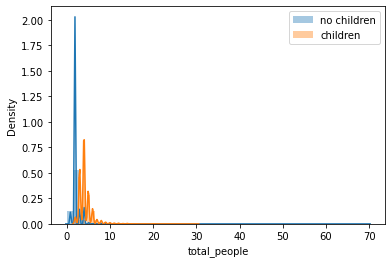

In [127]:
# Comparison bwtween distributions of total people whether kids are included or not
sns.distplot(df[~df['with_children']]['total_people'], label='no children', color='C0')
sns.distplot(df[df['with_children']]['total_people'], label='children', color='C1')

plt.legend()

# EXPORTING CLICKED AND BOOKED HOTELS BY USER
# OUT OF ATTRIBUTE: 'IMPRESSIONS'

 The following function is accepting as
input a string and splits it on char '|'
If the strings that were designed after the split have as last 3 characters these--> '0,0'
it means that this string's hotel was neither clicked nor booked. I do this in order to keep
the rest of the hotels. So the function return the strings with hotels booked or clicked

In [128]:

def func(x):
    b = []
    x = x.split('|')
    for i in x:
        if i[-3:] != '0,0':
            b.append(i)
    if len(b) == 0:
        b = 0
    return b

Applying the function on the impressions columns

In [129]:

df['impressions'] = df['impressions'].apply(func)

In [130]:
df = df[['user_id','search_timestamp', "days_before_staying",'impressions']]

In [131]:
df

,user_id,search_timestamp,days_before_staying,impressions
0,001bbff3030c95740d4c55bb72e823e9,2021-07-02T19:38:00.000Z,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,002ba2a7c74dbffc32e4568af230d49a,2021-06-23T03:39:00.000Z,79.0,0
2,00c5152ed6ef5b937e8320a260bde084,2021-06-10T00:08:00.000Z,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
3,00d5e2bca7962f67d5695e7e7b92feb8,2021-07-16T01:08:00.000Z,40.0,0
4,013f92616fe583c4ba0c3919b69cf3d9,2021-07-07T20:49:00.000Z,54.0,0
...,...,...,...,...
499995,cc87cfbbf5d2ab94f527a4b774a7c58b,2021-06-06T23:05:00.000Z,8.0,0
499996,cc87cfbbf5d2ab94f527a4b774a7c58b,2021-06-06T23:05:00.000Z,7.0,0
499997,cc87cfbbf5d2ab94f527a4b774a7c58b,2021-06-06T23:05:00.000Z,7.0,0
499998,cc87cfbbf5d2ab94f527a4b774a7c58b,2021-06-06T23:07:00.000Z,8.0,0


In [132]:
# Getting rid of searches without clicks
df =df[df['impressions']!=0]

In [133]:
#resetting index
df = df.reset_index()

In [134]:
#dropping the previous index column
df.drop('index', inplace=True, axis=1)

In [135]:
df

,user_id,search_timestamp,days_before_staying,impressions
0,001bbff3030c95740d4c55bb72e823e9,2021-07-02T19:38:00.000Z,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,00c5152ed6ef5b937e8320a260bde084,2021-06-10T00:08:00.000Z,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
2,016f433e1e98146912a7c2600c2ad3f0,2021-06-25T05:54:00.000Z,30.0,"[1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]"
3,01a367de6a4a099fbd380ad28f9314aa,2021-06-10T22:04:00.000Z,53.0,"[1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]"
4,028382cf0696909da6c5bc201a4a2027,2021-06-04T09:01:00.000Z,14.0,"[1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]"
...,...,...,...,...
95163,cbd24371f2930cbbd340d5f8e2c2eb02,2021-07-29T16:37:00.000Z,21.0,"[25,6308466,0,5.0,300.0,4.0,1,0,4,1,0]"
95164,cc083eb6383c22b422d36e2b6ddf08a5,2021-06-29T09:37:00.000Z,3.0,"[5,1612315,0,5.0,25.0,null,0,0,4,1,0]"
95165,cc48bc142619c06d53b26709cffc5ab5,2021-07-25T10:53:00.000Z,2.0,"[2,2440770,0,4.0,125.0,4.0,0,1,2,1,0, 46,51998..."
95166,cc48bc142619c06d53b26709cffc5ab5,2021-07-25T10:54:00.000Z,3.0,"[2,2440770,0,4.0,125.0,4.0,0,1,1,1,0, 3,531911..."


#### I brought the dataset to a structure where only the hotels clicked or booked are included.
#### Next I will create a dataset in which each row will be about a different click

In [136]:
# Buliding a new df which contains only users,days_before_staying and impressions
df2 = pd.DataFrame(columns=[])
a=[]
b=[]
c=[]
d=[]

for i in range(0,len(df)):
    for y in range(0,len(df['impressions'][i])):
        a.append(df['user_id'][i])
        b.append(df['search_timestamp'][i])
        c.append(df['days_before_staying'][i])
        d.append(df['impressions'][i][y])
        
df2['user_id'] = a
df2['search_timestamp'] = b
df2['days_before_staying'] = c
df2['impressions'] = d

In [137]:
# Splitting the information inside impressions

def collapse(x):
    return x.split(',')

In [138]:

df2['impressions'] = df2['impressions'].apply(collapse)

In [139]:
# Creating new columns
names = ['rank','prop_id','is_travel_ad','review_rating','review_count',
         'star_rating','is_free_cancellation','is_drr','price_bucket',
        'num_clicks','is_trans']
for i in range(0,len(names)):
    
    df2[names[i]] = df2['impressions'].apply(lambda x: x[i])

In [140]:
# Types of columns
df2.dtypes

user_id                  object
search_timestamp         object
days_before_staying     float64
impressions              object
rank                     object
prop_id                  object
is_travel_ad             object
review_rating            object
review_count             object
star_rating              object
is_free_cancellation     object
is_drr                   object
price_bucket             object
num_clicks               object
is_trans                 object
dtype: object

In [141]:
# Replacing texts writting null with actual None
df2 = df2.replace('null', None)

In [142]:
df2.isna().sum()

user_id                    0
search_timestamp           0
days_before_staying     2873
impressions                0
rank                       0
prop_id                    0
is_travel_ad               0
review_rating              0
review_count               0
star_rating                0
is_free_cancellation       0
is_drr                     0
price_bucket               0
num_clicks                 0
is_trans                   0
dtype: int64

In [143]:
# Changing types of columns

df2['rank']=df2['rank'].astype(float)

df2['is_travel_ad']=df2['is_travel_ad'].astype(float)
df2['review_rating']=df2['review_rating'].astype(float)
df2['review_count']=df2['review_count'].astype(float)
df2['star_rating']=df2['star_rating'].astype(float)
df2['is_free_cancellation']=df2['is_free_cancellation'].astype(float)
df2['is_drr']=df2['is_drr'].astype(float)
df2['num_clicks']=df2['num_clicks'].astype(int)
df2['is_trans']=df2['is_trans'].astype(int)
# I do not care about the quantity of clicks on a hotel
# When we have clicks I will assume that the user clicked it
df2['num_clicks'] = df2['num_clicks'].apply(lambda x: x>0).astype(int)

In [144]:
df2['search_timestamp'] =pd.to_datetime(df2['search_timestamp'])

In [145]:
df2 = df2.sort_values(by=['user_id', 'search_timestamp'])

In [146]:
df2 = df2.reset_index()
df2.drop('index', inplace=True, axis=1)

In [147]:
df2['price_bucket']=df2['price_bucket'].astype(int)

#### Building dfs with only transactions and only not transactions
#### I am aiming to isolate the users who booked AND clicked

In [148]:
# Building dfs with only transactions and only not transactions
# I am aiming to isolate the users who booked AND clicked
users1 = df2[df2['is_trans']==1]['user_id']
users0 = df2[df2['is_trans']==0]['user_id']

In [149]:
df3 = df2.copy()

In [150]:
df3.drop(df3.index, inplace=True)

In [151]:
for i in users1.unique():
    if i in users0.unique():
        df3 = df3.append(df2[df2['user_id'] ==i])

In [152]:
k = df3.groupby(['user_id','is_trans']).mean()

#### k dataset is a groupby of df3 in order to see the differences of hotels of each user when booking them or not

In [153]:
k

days_before_staying       rank  \
user_id                          is_trans                                   
0013d44c284290287de2d9088207a2eb 0                    2.000000   3.666667   
                                 1                    1.333333   3.000000   
0021ad1604dd8da02ab70785a7ef1eed 0                   28.428571  12.000000   
                                 1                    1.333333   6.333333   
0024442a9377078bd72a75494a0a4250 0                   22.714286   8.714286   
...                                                        ...        ...   
ffef9648bb989739f9fd9ba39811948d 1                    4.000000  11.000000   
fff2348d6dfdb203d0f4bc8bbf111eca 0                    0.000000  25.000000   
                                 1                    1.500000  42.500000   
fff4c17873151f0596c0ccab4e7c53ca 0                   45.166667   4.666667   
                                 1                   46.000000  50.500000   

                                           is_travel_ad  review_rating  \
user_id                          is_trans                                
0013d44c284290287de2d9088207a2eb 0             0.333333       4.666667   
                                 1             0.333333       5.000000   
0021ad1604dd8da02ab70785a7ef1eed 0             0.000000       3.571429   
                                 1             0.333333       3.666667   
0024442a9377078bd72a75494a0a4250 0             0.071429       4.142857   
...                                                 ...            ...   
ffef9648bb989739f9fd9ba39811948d 1             0.000000       4.000000   
fff2348d6dfdb203d0f4bc8bbf111eca 0             0.000000       4.000000   
                                 1             0.000000       4.000000   
fff4c17873151f0596c0ccab4e7c53ca 0             0.000000       3.666667   
                                 1             0.000000       3.490000   

                                           review_count  star_rating  \
user_id                          is_trans                              
0013d44c284290287de2d9088207a2eb 0           483.333333     4.333333   
                                 1            58.333333     4.000000   
0021ad1604dd8da02ab70785a7ef1eed 0          1046.428571     3.000000   
                                 1           558.333333     3.666667   
0024442a9377078bd72a75494a0a4250 0          1155.357143     3.142857   
...                                                 ...          ...   
ffef9648bb989739f9fd9ba39811948d 1           600.000000     3.000000   
fff2348d6dfdb203d0f4bc8bbf111eca 0          1012.500000     3.000000   
                                 1           687.500000     3.000000   
fff4c17873151f0596c0ccab4e7c53ca 0           445.833333     2.500000   
                                 1           118.250000     3.400000   

                                           is_free_cancellation    is_drr  \
user_id                          is_trans                                   
0013d44c284290287de2d9088207a2eb 0                     1.000000  0.000000   
                                 1                     0.666667  0.000000   
0021ad1604dd8da02ab70785a7ef1eed 0                     0.428571  0.714286   
                                 1                     0.666667  0.666667   
0024442a9377078bd72a75494a0a4250 0                     1.000000  0.785714   
...                                                         ...       ...   
ffef9648bb989739f9fd9ba39811948d 1                     1.000000  1.000000   
fff2348d6dfdb203d0f4bc8bbf111eca 0                     0.000000  0.000000   
                                 1                     1.000000  0.500000   
fff4c17873151f0596c0ccab4e7c53ca 0                     0.333333  0.000000   
                                 1                     0.130000  0.140000   

                                           price_bucket  num_clicks  
user_id                          is_trans                            

### Distributions of bucket lists for clicks that became a transaction and clicks that didn't

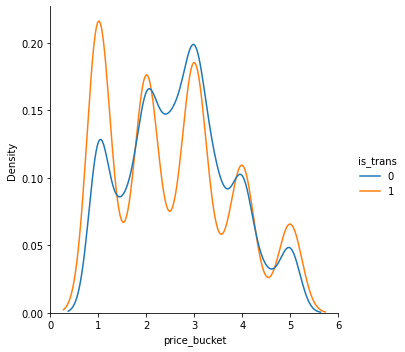

In [154]:
sns.displot(x = 'price_bucket',hue = 'is_trans',data = k, kind="kde")
# Obviously the visitors are clicking on average on more expensive 
# hotels than the ones they are booking

#### In order to understand better what is going on based on price_buckets we will create
#### a new column which will compare each user's searches and purchases

In [155]:
bucket_analogy = []
for i in range(0,len(k)-1,2):
    for y in range(0,2):
        bucket_analogy.append(k['price_bucket'][i]/k['price_bucket'][i+1])

In [156]:
len(bucket_analogy)

7256

In [157]:
k['bucket_analogy'] = bucket_analogy

In [159]:
k = k.reset_index()

#### I am going to round the buckets averages in order to have meaningful plots

In [160]:
k['price_bucket'] = k['price_bucket'].apply(round)

In [161]:
k['price_bucket'].value_counts()

2    2043
3    2019
1    1505
4    1194
5     495
Name: price_bucket, dtype: int64

In [162]:
k['bucket_analogy'].describe()

count    7256.000000
mean        1.286077
std         0.804634
min         0.200000
25%         0.812500
50%         1.000000
75%         1.500000
max         5.000000
Name: bucket_analogy, dtype: float64

<ipython-input-163-4bcbb4340f98>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==1]);


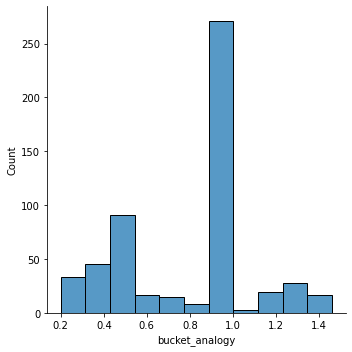

In [163]:
sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==1]);


<ipython-input-164-2448cf26da78>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==2]);


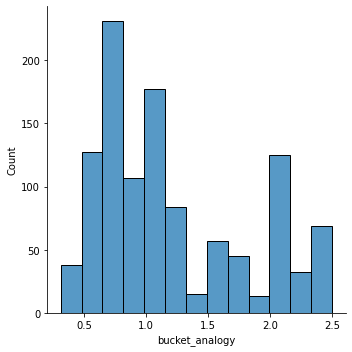

In [164]:
sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==2]);

<ipython-input-165-c5150226af14>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==3]);


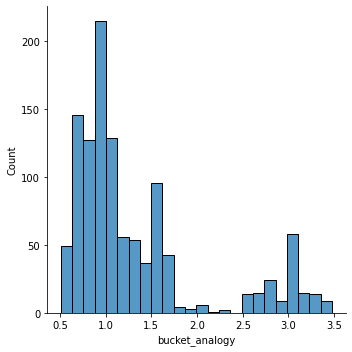

In [165]:
sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==3]);

<ipython-input-166-42c8c0f81768>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==4]);


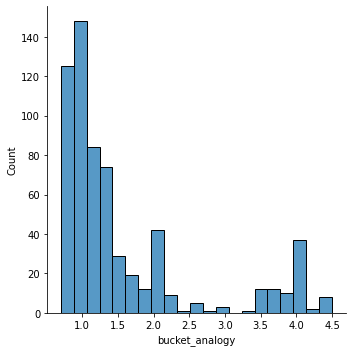

In [166]:
sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==4]);

<ipython-input-167-cebb4da04744>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==5]);


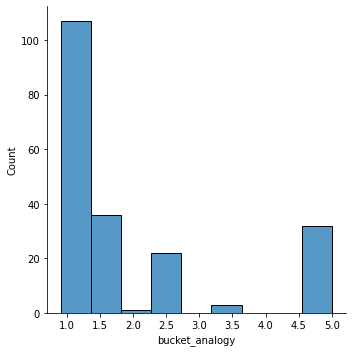

In [167]:
sns.displot(x ='bucket_analogy',data = k[k['is_trans']==0][k['price_bucket']==5]);

## The analogy seems a bit tricky. Let's see if their difference would make more sense.

In [168]:
bucket_difference = []
for i in range(0,len(k)-1,2):
    for y in range(0,2):
        bucket_difference.append(k['price_bucket'][i]-k['price_bucket'][i+1])

In [169]:
len(bucket_difference)

7256

In [170]:
k['bucket_difference'] = bucket_difference

<ipython-input-178-32da23c17382>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==1],stat='probability');


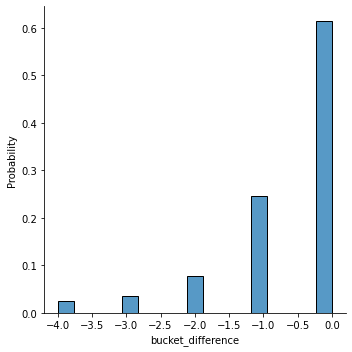

In [178]:
sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==1],stat='probability');

<ipython-input-179-c76f8f8f0d2b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==2],stat='probability');


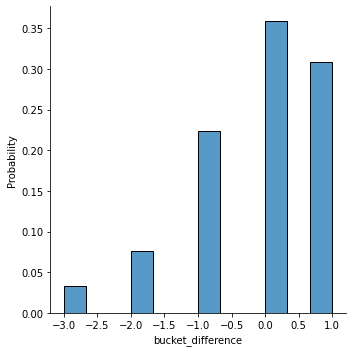

In [179]:
sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==2],stat='probability');

In [180]:
sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==3,stat='probability']);

SyntaxError: invalid syntax (<ipython-input-180-3cd4e45b70d7>, line 1)

<ipython-input-181-3c43e1d55cad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==4],stat='probability');


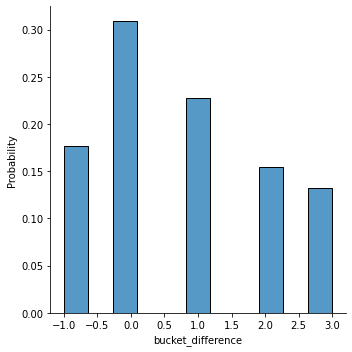

In [181]:
sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==4],stat='probability');

<ipython-input-182-24120e00e2ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==5],stat='probability');


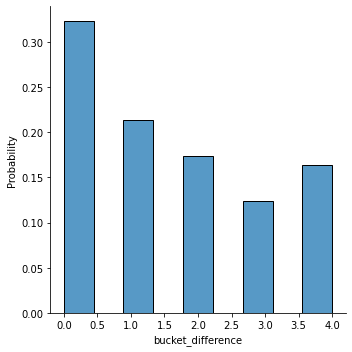

In [182]:
sns.displot(x ='bucket_difference',data = k[k['is_trans']==0][k['price_bucket']==5],stat='probability');

The less the starting price bucket, the more the commitment of the users on their searches. We see that 
as the price_bucket is getting higher, the distribution is being even more spreaded.